# Report: Car accident severity prediction

## 1. Introduction and problem definition
The main goal of this project is to predict the severity of an accident (i.e. material and non-material resources damages, human health consequences, etc.) given road, weather, time and other conditions.


There are many reasons why a project like this can be atractive/appealing to many people, and society as a whole. It can lead to the reduction of the number of accidents and/or their severity. It will improve the car users experience, increase insurance companies profits, reduce maintenance cost on roads and their environment, improve the traffic and, of course, reduce the number, frequency and/or severity of human damage.

## 2. Data adquisition and summary
Data has been provided through a CSV file containing almost 195000 rows (data "observations") and 37 columns (data attributes/features), apart from the "target" column corresponding to the "severity" of each accident, whih takes one of only two values: 1 and 2. This last fact makes our problem take the form of a binary classification problem.

## 3. Data preparation
There are several pieces of evidence suggesting that the original dataset is not ready to be used by our model:
1. There are several missing values, i.e. blank entries. We can fix this by deleting/dropping the entire rows corresponding to these values.
2. Some very useful columns, such as those referring to weather, road condition and light condition, present categorical data, which we should convert into numerical data (via hot-encoding) so our model can work with them properly.
3. There are some clearly useless (for our purpose) columns, which we will drop.



### 3.1. Data cleaning
Some columns were useless, in the sense that they are uninformative for our purpose. We dropped them:

    X
    Y
    SEVERITYCODE.1
    OBJECTID
    INCKEY
    COLDETKEY
    REPORTNO
    STATUS
    ADDRTYPE
    INTKEY
    LOCATION
    EXCEPTRSNCODE
    EXCEPTRSNDESC
    SEVERITYDESC
    PERSONCOUNT
    INCDATE
    SDOT_COLCODE
    SDOT_COLDESC
    INATTENTIONIND
    PEDROWNOTGRNT
    SDOTCOLNUM
    SPEEDING
    ST_COLCODE
    ST_COLDESC
    SEGLANEKEY
    CROSSWALKKEY
    HITPARKEDCAR

The columns which we are going to use one way or another include:

    COLLISIONTYPE
    PEDCOUNT
    PEDCYLCOUNT
    VEHCOUNT
    INCDTTM (which indicates the time when the accident happened)
    JUNCTIONTYPE
    UNDERINFL
    WEATHER
    ROADCOND
    LIGHTCOND

We will use these 10 columns, which represent attributes/features of the observations, to predict (or better, classify) the severity of the accident (the target column).

Now, there are several missing values, i.e. blank entries, throughout the dataset. We can fix this by deleting/dropping the entire rows corresponding to those values. After doing that, we get a dataset with 183177 rows × 10 columns.

### 3.2.Data formatting
This step may well be considered as feature engineering, because we trasnformed the feature columns in a way that will not only let the ML model work, but make it better and increase its performance.
* Colummn called 'UNDERINFL' had different entries for the same information (0=N, 1=Y), so we replaced "0" with "N" (No) and "1" with "Y" (Yes).
* The column 'COLLISIONTYPE' had some entries with the value 'Other', so we dropped those rows. We wanted to have fully informative rows!
* The column JUNCTIONTYPE had some entries with the value 'Unknown', so we dropped those rows. In that column we also shortened the values. This did not add or remove any information, but made the dataset easier to handle:

    'but not related to intersection' ==> 'NRI'

    'not related to intersection' ==> 'NRI'

    'but intersection related' ==> 'RI'

    'intersection related' ==> 'RI'
    
    
* We are only interested in things repeating in time because we want to predict events, so we basically dropped the years from the column 'INCDTTM'. We also transformed it into 3 columns, namely 'TIME' (with 24h format and without minutes), 'DAY_OF_WEEK' and 'MONTH'.
* The columns 'PEDCOUNT', 'PEDCYLCOUNT' and 'VEHCOUNT' on the original dataset have several values, but some of them have a really small frequency, so small that it would be counterproductive to train the model with them. We have dropped those who have less than 100 entries.
* The column 'WEATHER' had a mix of unuseful and low-frequency data. We dropped the rows corresponding to values having less than 100 entries and also the rows corresponding to the values "Unknown" and "Other".
* We did the exact same thing with the column 'ROADCOND'.
* The 'LIGHTCOND' column had the same problems as the 'ROADCOND' and 'WEATHER' columns, so we did the same thing with it. In addition to that, the values "Dark - No Street Lights" and "Dark - Street Lights Off" refer to situations with basically the same lighting condition because having lights off is similar to having no lights at all, so we renamed "Dark - No Street Lights" to "Dark - Street Lights Off".
* The last (but not the least) thing we did was to encode all the categorical variables as one-hot vectors, where a categorical feature becomes an array whose size is the number of possible choices for that feature.

## 4. Predictive modeling
A classification approach has been chosen over a regression one. Due to the features taking both numeric and categorical data, diferent algorithms have been chosen to solve the classification problem:
* Logistic Regression
* Random Forest 
* Decision Tree
* Support Vector Machine (SVM)

A KNN algorithm was also considered, but due to the size of the dataset after all the data preparation steps it was decided not to use it, as KNN algorithms usually need a value of k of the order of $\sqrt{N}$, where $N$ is the number of observations, and this would need very powerful hardware resources and time to work!

## 5. Results
### 5.1. Logistic Regression
    Train accuracy: 0.730925798300023
    Test accuracy: 0.7315856213474473
    F1-score: 0.70
              precision    recall  f1-score   support

           1       0.73      0.93      0.82     24117
           2       0.72      0.33      0.45     12159

    accuracy                           0.73     36276
    macro avg      0.73      0.63      0.64     36276
    weighted avg   0.73      0.73      0.70     36276
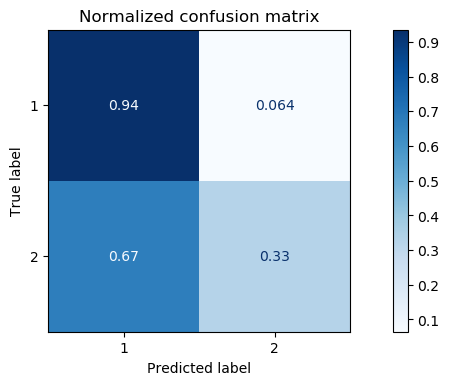

### 5.2. Random Forest
    Accuracy: 69.36
    F1-score: 0.68
              precision    recall  f1-score   support

           1       0.75      0.82      0.78     24117
           2       0.55      0.45      0.49     12159

    accuracy                           0.69     36276
    macro avg      0.65      0.63      0.64     36276
    weighted avg   0.68      0.69      0.68     36276


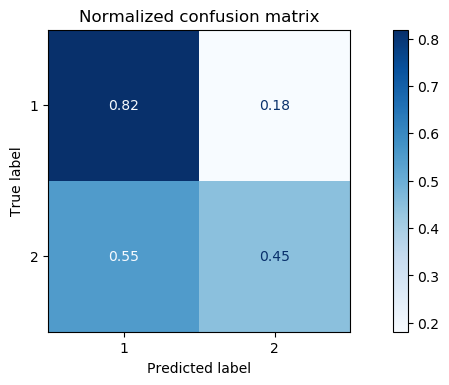

### 5.3. Decision Tree
    Train set Accuracy:  0.7313760624856421
    Test set Accuracy:  0.7320542507442938
    F1-score: 0.69
              precision    recall  f1-score   support

           1       0.73      0.94      0.82     24117
           2       0.74      0.31      0.44     12159

    accuracy                           0.73     36276
    macro avg      0.73      0.63      0.63     36276
    weighted avg   0.73      0.73      0.69     36276


The best value for the depth of the tree is 6:
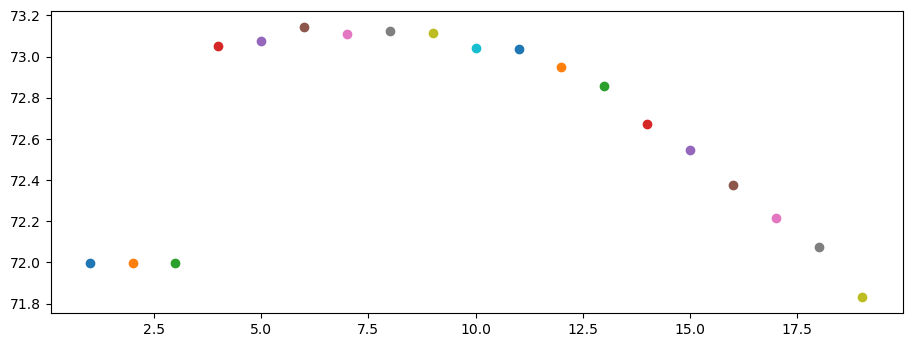

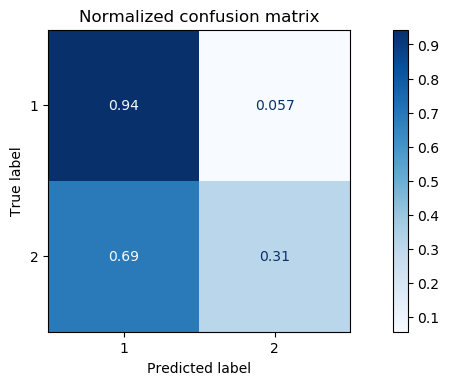

### 5.4. Support Vector Machine (SVM)
    Train set Accuracy:  0.7318355157362738
    Test set Accuracy:  0.7327985444922263
    F1-score: 0.70
              precision    recall  f1-score   support

           1       0.73      0.94      0.82     24117
           2       0.73      0.32      0.44     12159

    accuracy                           0.73     36276
    macro avg      0.73      0.63      0.63     36276
    weighted avg   0.73      0.73      0.70     36276


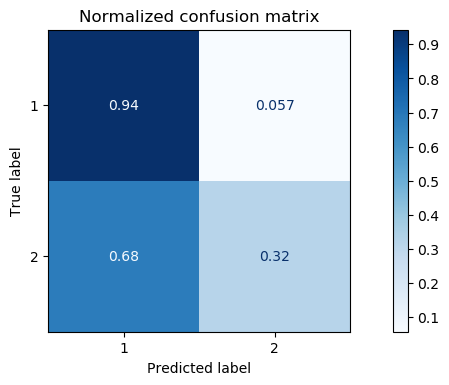

## 6. Discussion
As we can see, the model/algorithm that yields the best __overall__ results is the Random Forest. It is able to correctly predict about half the accidents with severity "2" and around four out of five accidents with severity "1". Any of the other algorithms we have used are better than that at predicting the value "1" for severity, but they are worse at predicting the other value.

## 7. Conclusion
We have been able to build a model that is able to predict the severity of an accident in the test set with almost 70% accuracy. However, this model is biased towards the value "1", even though we downsampled the entries with severity code "1" to match the number of entries/observations of accidents with severity code "2". One of the reasons may be that most of the entries we dropped during the data cleaning step corresponded to this value.